In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/SameerBramhecha/LP-5/master/DL/goog1.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400


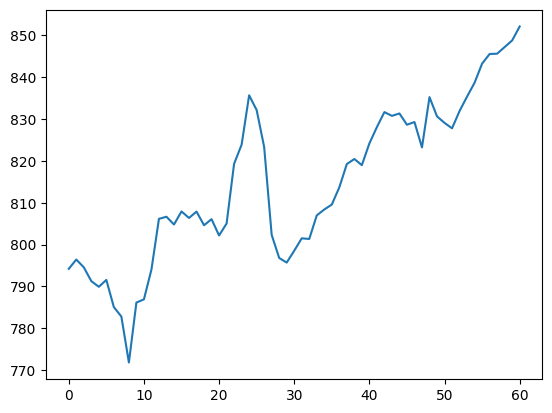

In [4]:
plt.plot(df['Close'])

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(np.array(df['Close']).reshape(-1,1))

In [6]:
training_size = int(len(df_normalized)*0.8)
train_data, test_data = df_normalized[:training_size, :], df_normalized[training_size:, :]

In [7]:
len(train_data), len(test_data)

(48, 13)

In [8]:
def create_dataset(data, step=4):
  x = []
  y = []
  for i in range(len(data) - step):
    x.append(data[i:i+step, 0])
    y.append(data[i+step, 0])

  return np.array(x), np.array(y)

# basically if dataset is [123 124 125 124 123 125 127]
# Independent 4 days  -> next day dependent
# s1  s1  s2  s3  y
# 123 124 125 124 123
# 124 125 124 123 125
# 125 124 123 125 127

x_train, y_train = create_dataset(train_data)
x_test, y_test = create_dataset(test_data)



In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
2/2 [==============================] - 9s 36ms/step - loss: 0.2522
Epoch 2/50
2/2 [==============================] - 0s 22ms/step - loss: 0.2190
Epoch 3/50
2/2 [==============================] - 0s 17ms/step - loss: 0.1877
Epoch 4/50
2/2 [==============================] - 0s 17ms/step - loss: 0.1555
Epoch 5/50
2/2 [==============================] - 0s 13ms/step - loss: 0.1262
Epoch 6/50
2/2 [==============================] - 0s 32ms/step - loss: 0.0980
Epoch 7/50
2/2 [==============================] - 0s 29ms/step - loss: 0.0715
Epoch 8/50
2/2 [==============================] - 0s 37ms/step - loss: 0.0479
Epoch 9/50
2/2 [==============================] - 0s 18ms/step - loss: 0.0303
Epoch 10/50
2/2 [==============================] - 0s 21ms/step - loss: 0.0204
Epoch 11/50
2/2 [==============================] - 0s 18ms/step - loss: 0.0221
Epoch 12/50
2/2 [==============================] - 0s 21ms/step - loss: 0.0306
Epoch 13/50
2/2 [==============================] - 0s 19ms/st

In [10]:
metrics = model.evaluate(x_test, y_test)
metrics

1/1 [==============================] - 2s 2s/step - loss: 0.0226


0.022577762603759766

In [11]:
y_pred=scaler.inverse_transform(model.predict(x_test))
y_test=scaler.inverse_transform(np.array(y_test).reshape(-1,1))

1/1 [==============================] - 2s 2s/step


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

MAE:  11.68502460720486
MSE:  145.58337631895085
RMSE:  12.065793646459849


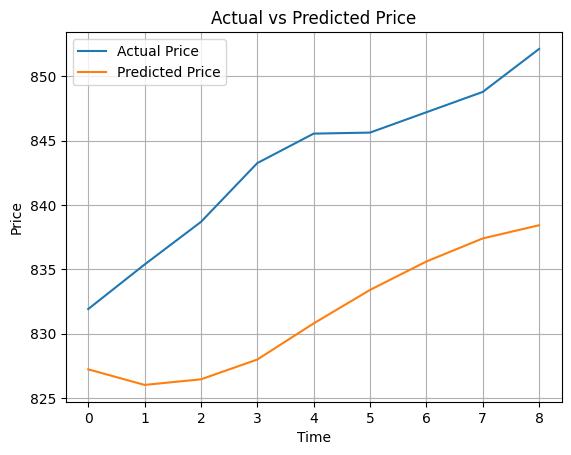

In [26]:
plt.plot(y_test, label='Actual Price')

# Plotting the predicted prices
plt.plot(y_pred, label='Predicted Price')

plt.title('Actual vs Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()